# 🛒SHOPPER SPECTRUM: CUSTOMER SEGMENTATION AND PRODUCT                            RECOMMENDATIONS IN E-COMMERCE 
                     

## 1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2.LOAD DATASET

In [3]:
df = pd.read_csv('online_retail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3.UNDERASTANDING DATASET

### SHAPE

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### STATISTICAL SUMMARY

In [7]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### CHECKING MISSING VALUES

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### CHECKING DUPLICATE VALUES

In [9]:
df.duplicated().sum()

np.int64(5268)

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## 4.DATA PROCESSING

### 4.1.DROPPING ROWS WITH MISSING CUSTOMERID

In [13]:
df.dropna(subset=['CustomerID'], inplace=True)

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 4.2.DROPPING DUPLICATED DATA

In [16]:
df.duplicated().sum()

np.int64(5225)

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

np.int64(0)

### 4.3.EXCLUDE CANCELLED INVOICES(INVOICE_NO STARTING WITH 'C')

In [19]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [20]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
581491      1
581487      1
581483      1
581479      1
536380      1
Name: count, Length: 18536, dtype: int64

### 4.4.REMOVE NEGATIVE OR ZERO QUANTITIES AND PRICES

In [21]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


## 5.EXPLORATORY DATA ANALYSIS(EDA)

### 5.1.IMPORTING LIBRARIES

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### 5.2.DATA VISUALIZATION

### 5.2.1.ANALYZE TRANSACTION VOLUME BY COUNTRY

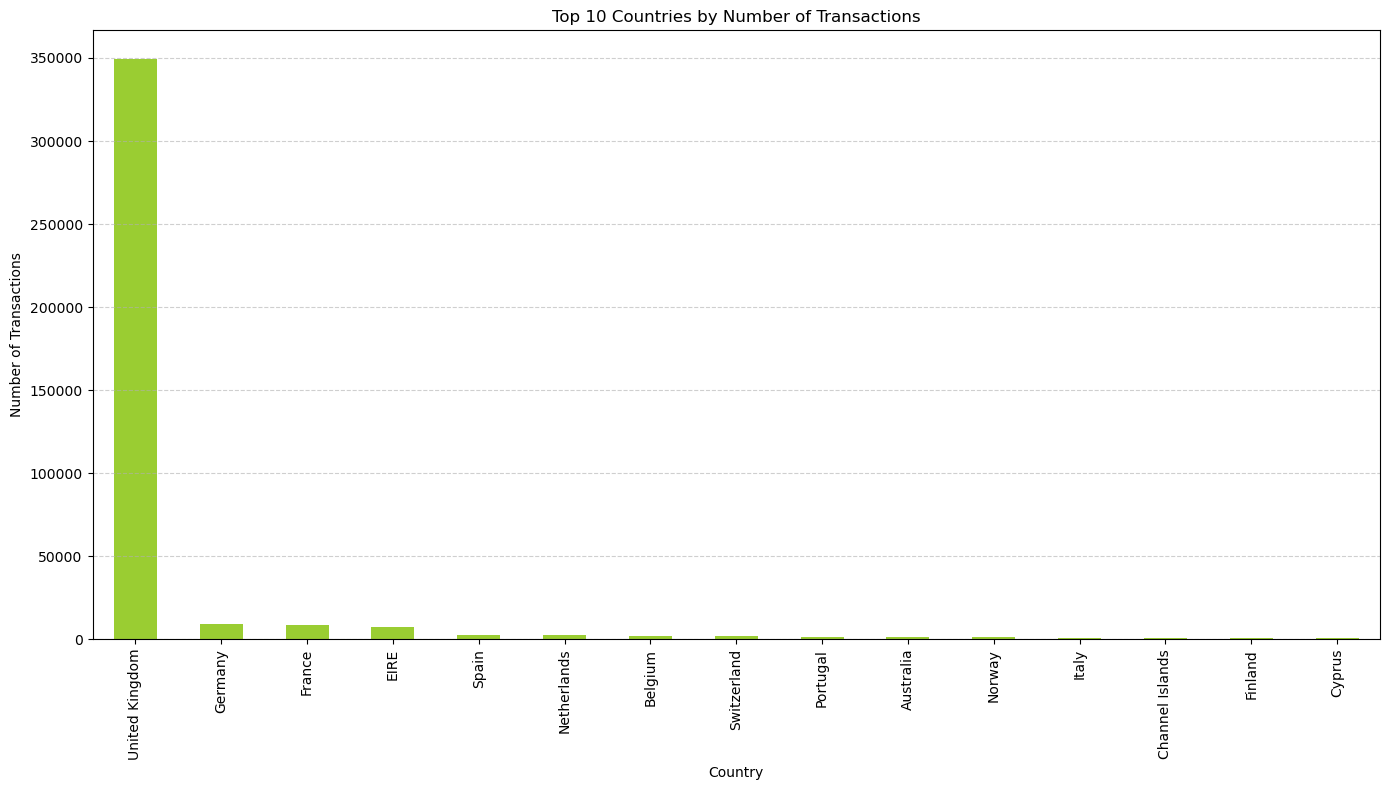

In [24]:
country_orders = df['Country'].value_counts().head(15).sort_values(ascending=False)

#colors = cm.rainbow(np.linspace(0, 1, 10))

plt.figure(figsize=(14, 8))
country_orders.plot(kind='bar', color='yellowgreen')
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.2.2.TOP SELLING PRODUCTS

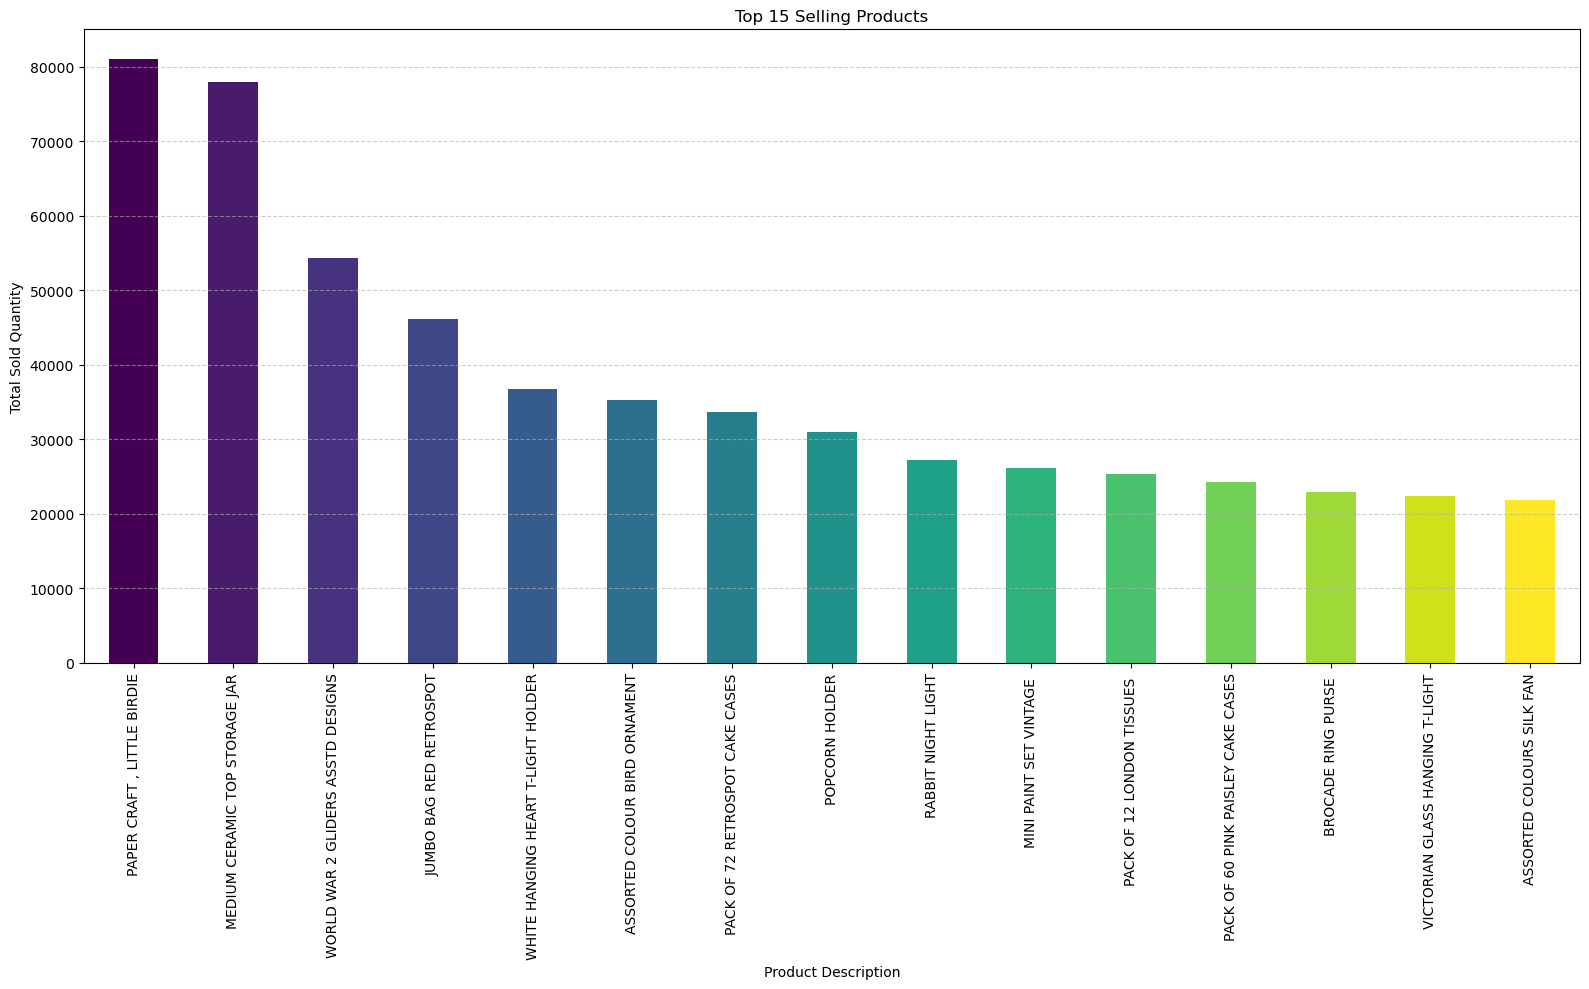

In [25]:
# Get top 15 selling products by quantity
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

# Use colormap
colors = cm.viridis(np.linspace(0, 1, 15))

plt.figure(figsize=(16, 10))
top_selling_products.plot(kind='bar', color=colors)
plt.title('Top 15 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Sold Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 5.2.3.PURCHASE TRENDS OVER TIME

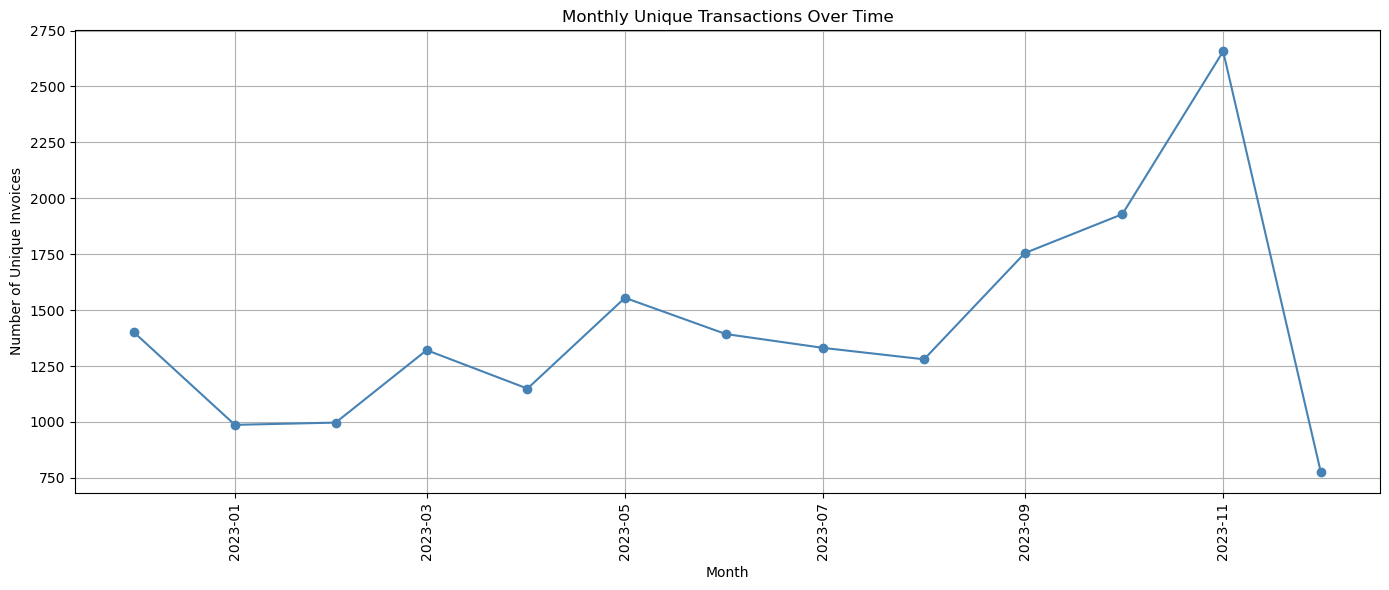

InvoiceMonth
2022-12-01    1400
2023-01-01     987
2023-02-01     997
2023-03-01    1321
2023-04-01    1149
2023-05-01    1555
2023-06-01    1393
2023-07-01    1331
2023-08-01    1280
2023-09-01    1755
2023-10-01    1929
2023-11-01    2657
2023-12-01     778
Freq: MS, Name: InvoiceNo, dtype: int64


In [26]:
# Convert InvoiceDate to datetime and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly unique invoice count
monthly_sales = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Optional: for better x-axis formatting

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='steelblue')
plt.title('Monthly Unique Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Unique Invoices')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(monthly_sales)

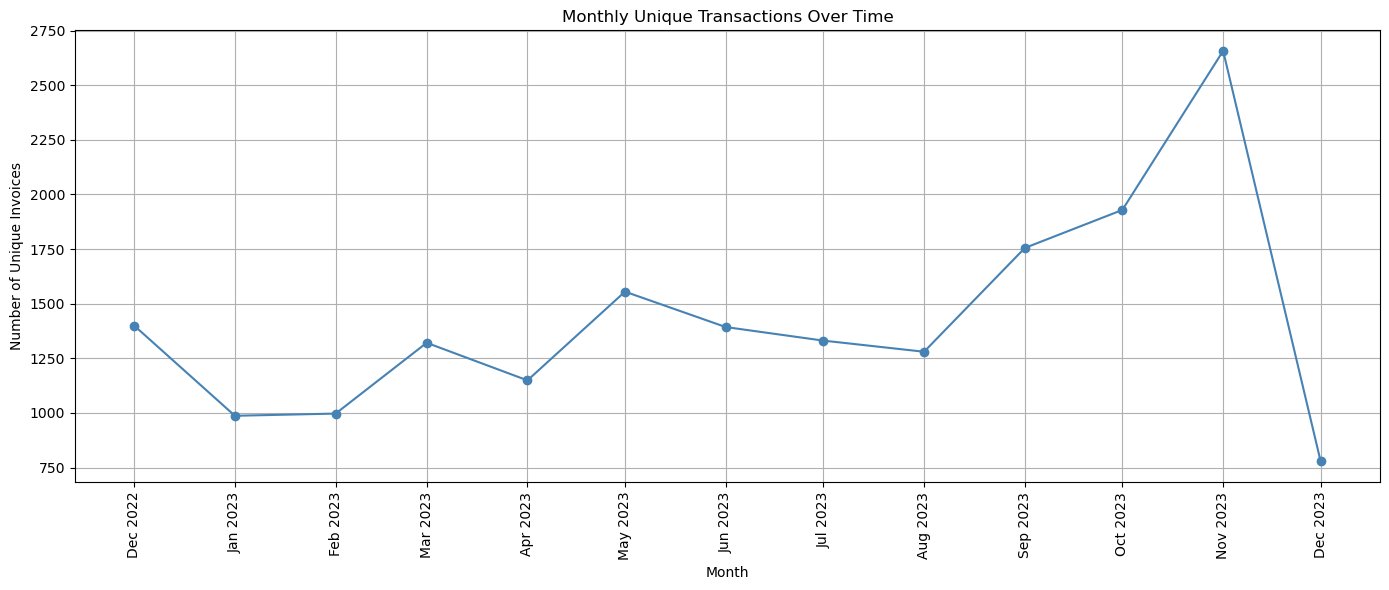

InvoiceMonth
2022-12-01    1400
2023-01-01     987
2023-02-01     997
2023-03-01    1321
2023-04-01    1149
2023-05-01    1555
2023-06-01    1393
2023-07-01    1331
2023-08-01    1280
2023-09-01    1755
2023-10-01    1929
2023-11-01    2657
2023-12-01     778
Freq: MS, Name: InvoiceNo, dtype: int64


In [27]:

import matplotlib.dates as mdates

# Convert InvoiceDate to datetime and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group and convert PeriodIndex to Timestamp
monthly_sales = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot with full month labels
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='steelblue')
plt.title('Monthly Unique Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Unique Invoices')

# Show one label per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

print(monthly_sales)

### 5.2.4.INSPECT MONETARY DISTRIBUTION PER TRANSACTION AND CUSTOMER

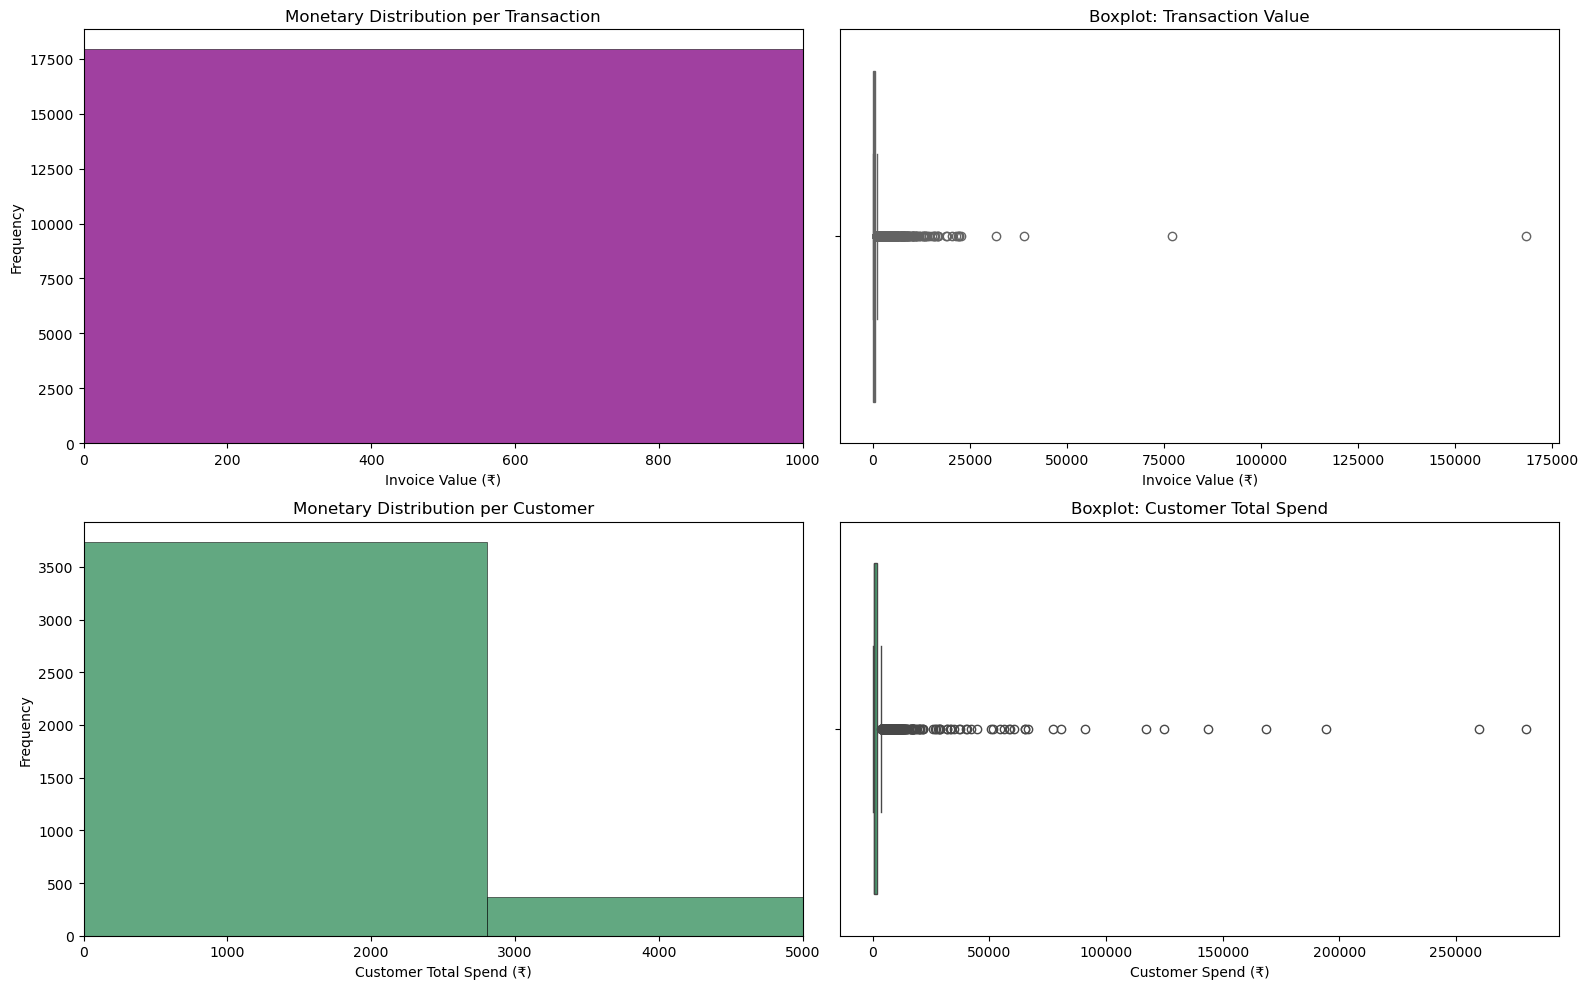

In [28]:
# --- Total price per line item ---
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- Total per Transaction (Invoice) ---
invoice_value = df.groupby('InvoiceNo')['TotalPrice'].sum()

# --- Total per Customer ---
customer_value = df.groupby('CustomerID')['TotalPrice'].sum()







# --- Plotting ---
plt.figure(figsize=(16, 10))

# 1. Histogram - Transaction Value
plt.subplot(2, 2, 1)
sns.histplot(invoice_value, bins=100, color='purple')
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Invoice Value (₹)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Focus on typical range

# 2. Boxplot - Transaction Value
plt.subplot(2, 2, 2)
sns.boxplot(x=invoice_value, color='orchid')
plt.title('Boxplot: Transaction Value')
plt.xlabel('Invoice Value (₹)')

# 3. Histogram - Customer Value
plt.subplot(2, 2, 3)
sns.histplot(customer_value, bins=100, color='seagreen')
plt.title('Monetary Distribution per Customer')
plt.xlabel('Customer Total Spend (₹)')
plt.ylabel('Frequency')
plt.xlim(0, 5000)

# 4. Boxplot - Customer Value
plt.subplot(2, 2, 4)
sns.boxplot(x=customer_value, color='mediumseagreen')
plt.title('Boxplot: Customer Total Spend')
plt.xlabel('Customer Spend (₹)')

plt.tight_layout()
plt.show()


### 5.2.5.RFM DISTRIBUTIONS

In [29]:
# Reference date: one day after last transaction



reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

In [30]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


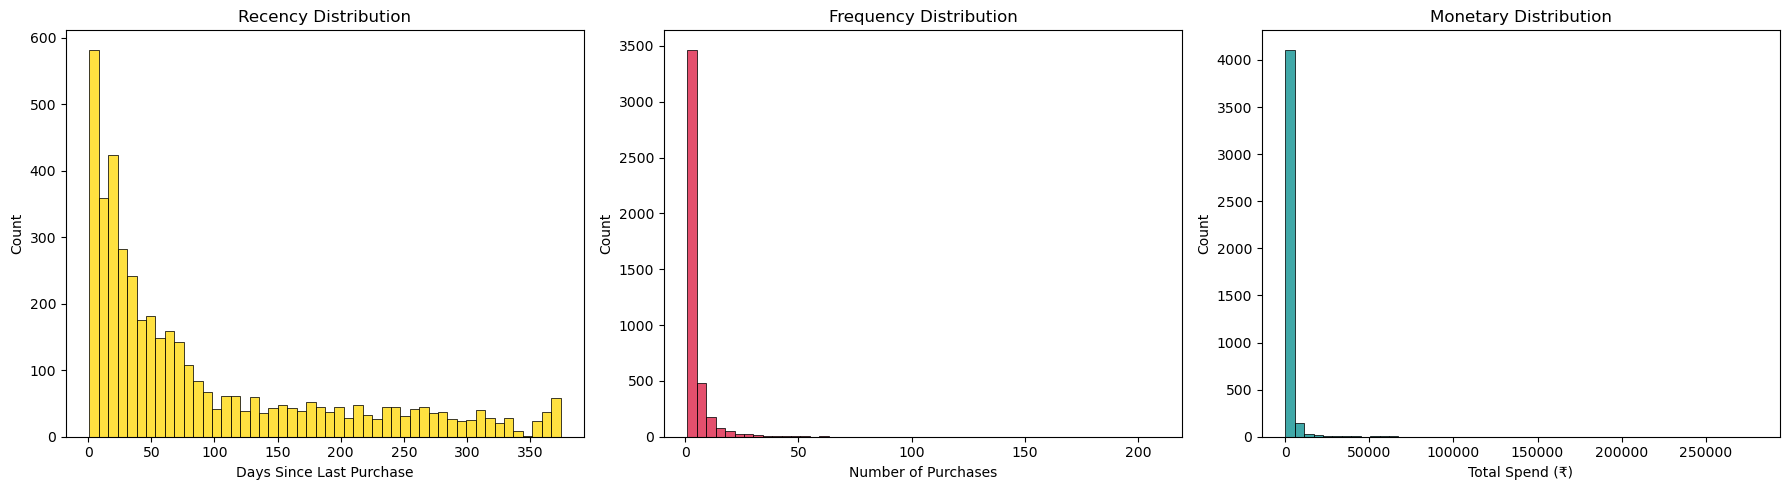

In [31]:

plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, color='#FFD700')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, color='#DC143C')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, color='#008B8B')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend (₹)')

plt.tight_layout()
plt.show()


### 5.2.6.ELBOW CURVE FOR CLUSTER SELECTION

#### Preprocess RFM for Clustering

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#### Elbow Method (Distortion vs. K)

In [33]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Elbow method to find optimal k
inertia = []
silhouette = []# Within-Cluster Sum of Squares

# Try K values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)  # Inertia 
    silhouette.append(silhouette_score(rfm_scaled, kmeans.labels_))   #silhouette_score



#### INERTIA

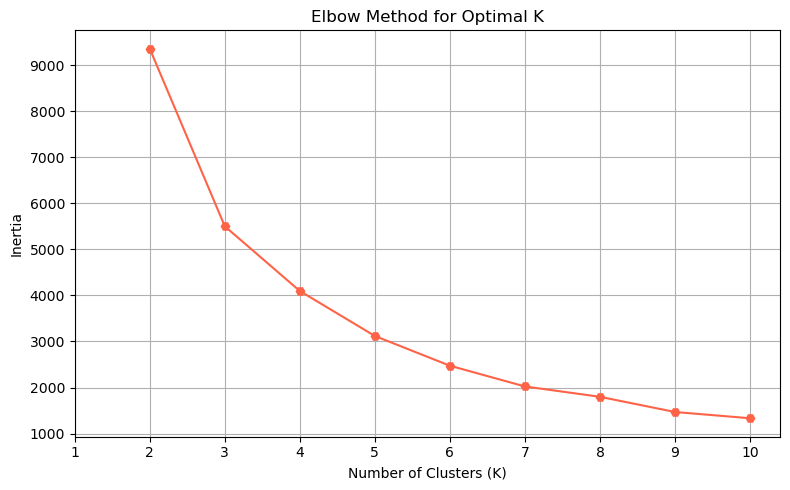

In [34]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='H', color='tomato')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

#### we can clearly see that the "elbow" occurs at K=4, where the rate of decrease in inertia slows down significantly.

#### SILHOUETTE SCORES

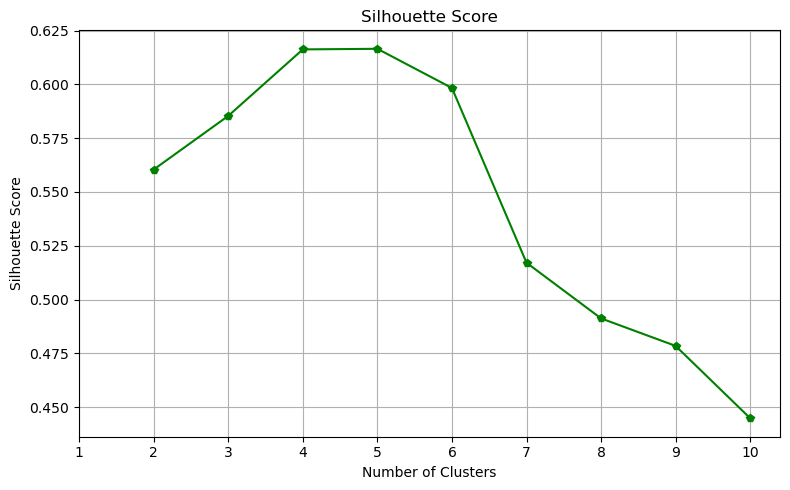

In [35]:

# Plot silhouette_scores

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette, marker='p', color='green')
plt.title("Silhouette Score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.2.7.CUSTOMER CLUSTER PROFILES

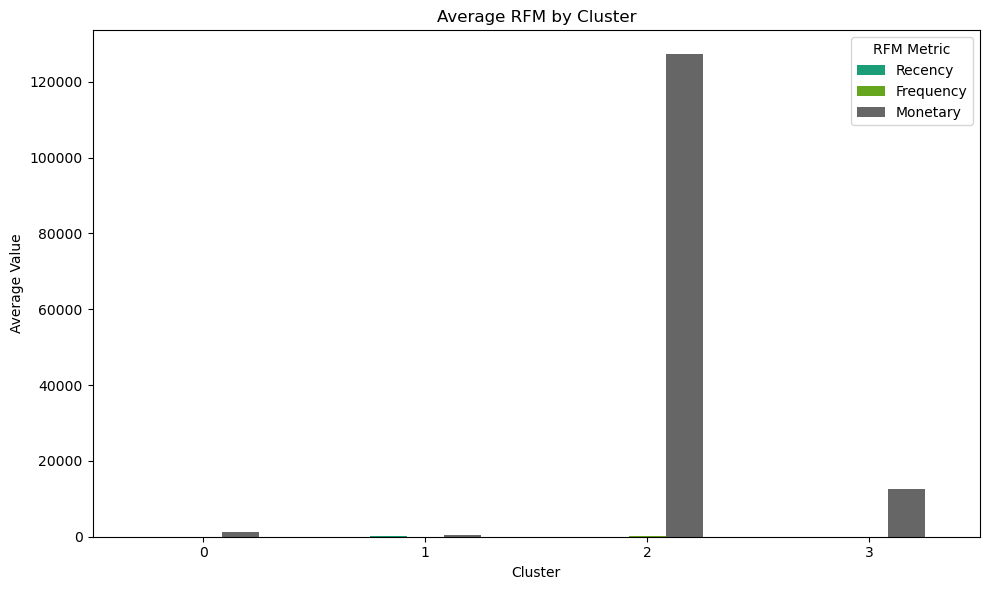

In [36]:

# Apply k-means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Average RFM per cluster (only RFM columns)
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize
cluster_summary.plot(kind='bar', figsize=(10, 6), colormap='Dark2')
plt.title('Average RFM by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='RFM Metric')
plt.tight_layout()
plt.show()


### 5.2.8.PRODUCT RECOMMENDATION HEATMAP/ SIMILARITY MATRIX

#### CREATE A USER-ITEM MATRIX

In [37]:
# Create pivot table: rows = customers, columns = products, values = purchase count
item_matrix = df.pivot_table(index='CustomerID',
                              columns='StockCode',
                              values='Quantity',
                              aggfunc='sum').fillna(0)

#### COMPUTE PRODUCT SIMILARITY(COSINE SIMILARITY)

In [39]:

from sklearn.metrics.pairwise import cosine_similarity

# Transpose so products are rows
product_similarity = cosine_similarity(item_matrix.T)

# Convert to DataFrame with StockCodes as index/columns
product_similarity_df = pd.DataFrame(product_similarity,
                              index=item_matrix.columns,
                              columns=item_matrix.columns)

In [40]:
product_similarity_df

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.001550,0.000990,0.0,0.000000,0.853895,0.052149,0.021922,0.003033,...,0.000000,0.0,0.000000,0.0,0.000000,0.038765,0.0,0.000310,0.0,0.074260
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020672,0.011878,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000007,0.0,0.000000
10120,0.001550,0.000000,1.000000,0.004911,0.0,0.000000,0.001397,0.027555,0.010435,0.009977,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.007736,0.0,0.000332
10123C,0.000990,0.000000,0.004911,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014985,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.038765,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.064845,0.153788,0.033250,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000441,0.0,0.000955
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153670,0.041252,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000
M,0.000310,0.000007,0.007736,0.000000,0.0,0.000000,0.000133,0.004341,0.005002,0.004154,...,0.000036,0.0,0.000004,0.0,0.001605,0.000441,0.0,1.000000,0.0,0.000474


#### HEATMAP

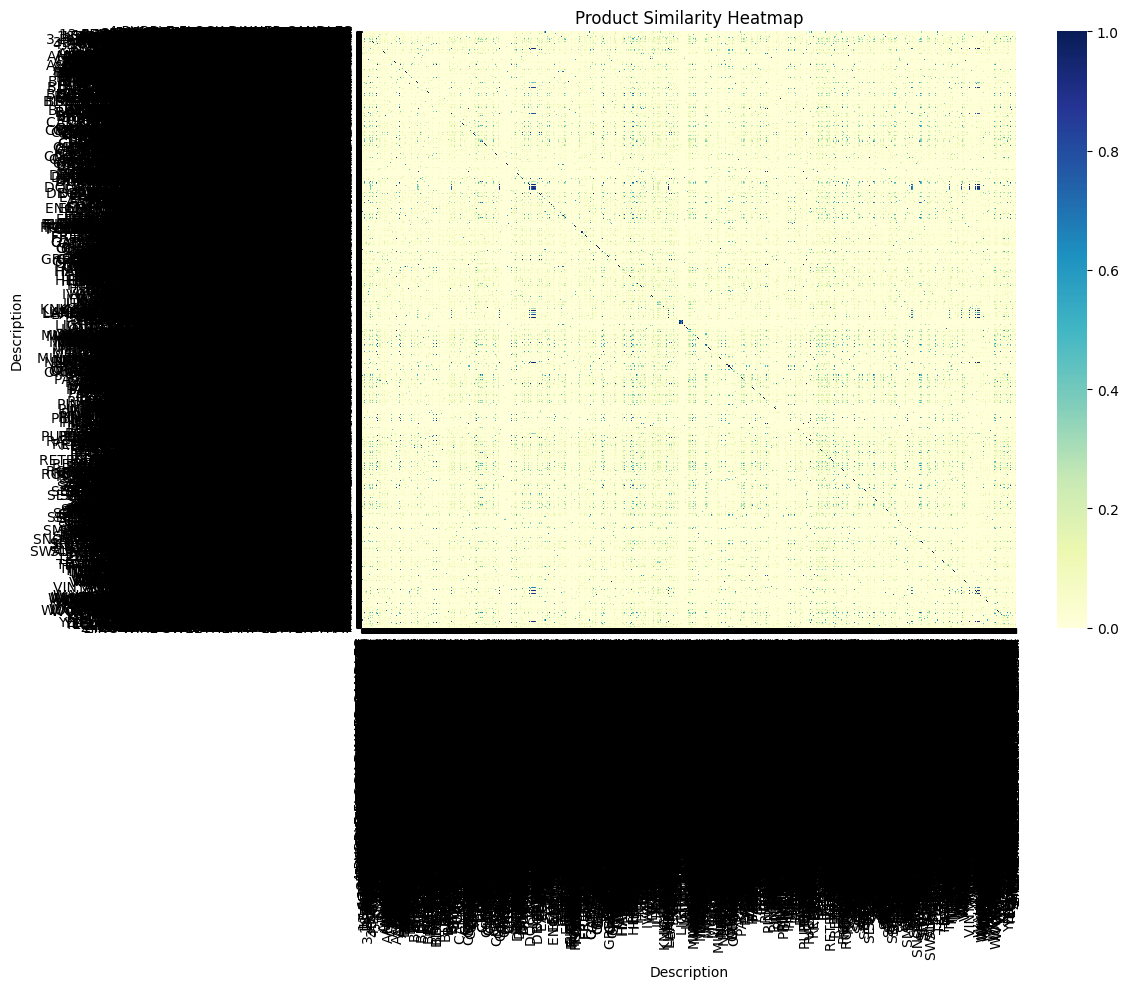

In [131]:
plt.figure(figsize=(12, 10))
sns.heatmap(product_sim_df, cmap='YlGnBu', xticklabels=True, yticklabels=True)
plt.title("Product Similarity Heatmap")
plt.tight_layout()
plt.show()

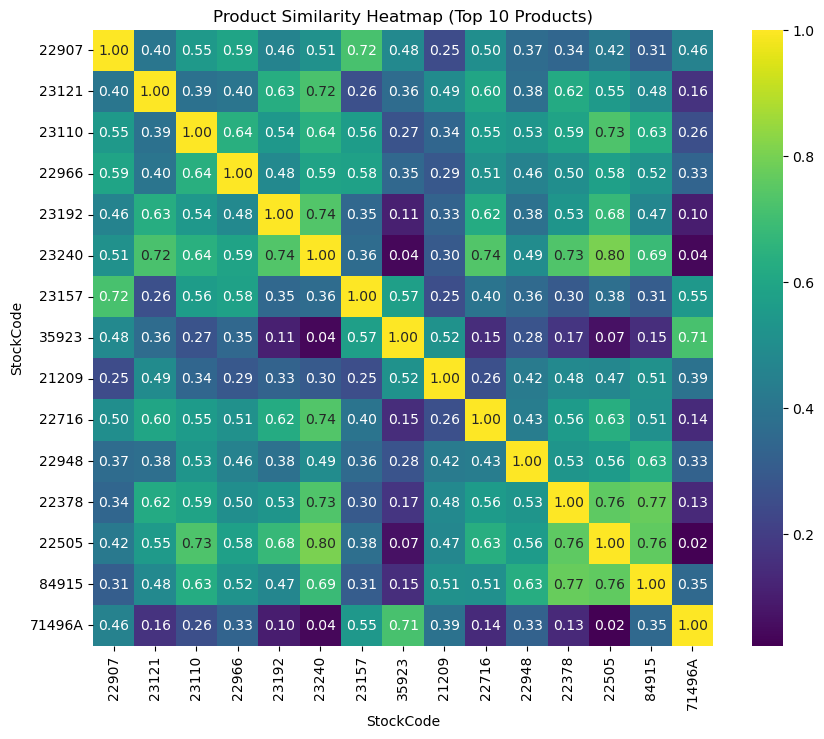

In [70]:

# Heatmap of top N similar products
top_n = 15
top_products = product_similarity_df.sum().sort_values(ascending=False).head(top_n).index


plt.figure(figsize=(10, 8))
sns.heatmap(product_similarity_df.loc[top_products, top_products], cmap='viridis', annot=True, fmt=".2f")
plt.title('Product Similarity Heatmap (Top 10 Products)')
plt.show()

### OBSERVATION

#### Diagonal = 1

**Every product is 100% similar to itself, hence the diagonal values are all 1.

**This is expected in a similarity matrix.

#### 🟢 High Similarity Pairs (Likely to be co-purchased)
#### These products show high similarity values (0.85 to 1.0) and are strong candidates for cross-recommendation:


DOLLY GIRL BEAKER & DOLLY GIRL LUNCH BOX - 0.86

FOOD CONTAINER SET 3 LOVE HEART	& RIBBON REEL LACE DESIGN - 0.80

MAGNETS PACK OF 4 HOME SWEET HOME &	CARD DOLLY GIRL - 0.90

DOLLY GIRL BEAKER & CARD DOLLY GIRL - 0.90


**These combinations suggest the products are:**

1.Bought together frequently

2.Likely part of the same theme or set (e.g., same character or design)

#### 🔴 Low Similarity Pairs (Rarely co-purchased)
#### Some cells show very low similarity (~0.01–0.02) indicating no common purchase pattern:


PURPLE DRESS JEWELLERY STAND & SPACEBOY MINI BACKPACK - 0.009

DOLLY GIRL LUNCH BOX & PURPLE DRESS JEWELLERY STAND - 0.011

**These are good to exclude from recommendation rules — they don’t align in customer preferences.**



## 6.CLUSTERING METHODOLOGY

### 6.1.FEATURE ENGINEERING

#### CREATE TOTAL PRICE COLUMN

In [44]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#### SET REFERENCE DATE(DAY AFTER LAST PUTCHASE)

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#### RMF CALCULATION

In [46]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})


#### RENAME COLUMNS

In [47]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [48]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### NOTE:

**Recency: Lower is better (purchased recently)**

**Frequency: Higher is better (more visits)**

**Monetary: Higher is better (spent more)**

### 6.2.STANDARDIZE/NORMALIZE THE RFM VALUES

In [49]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

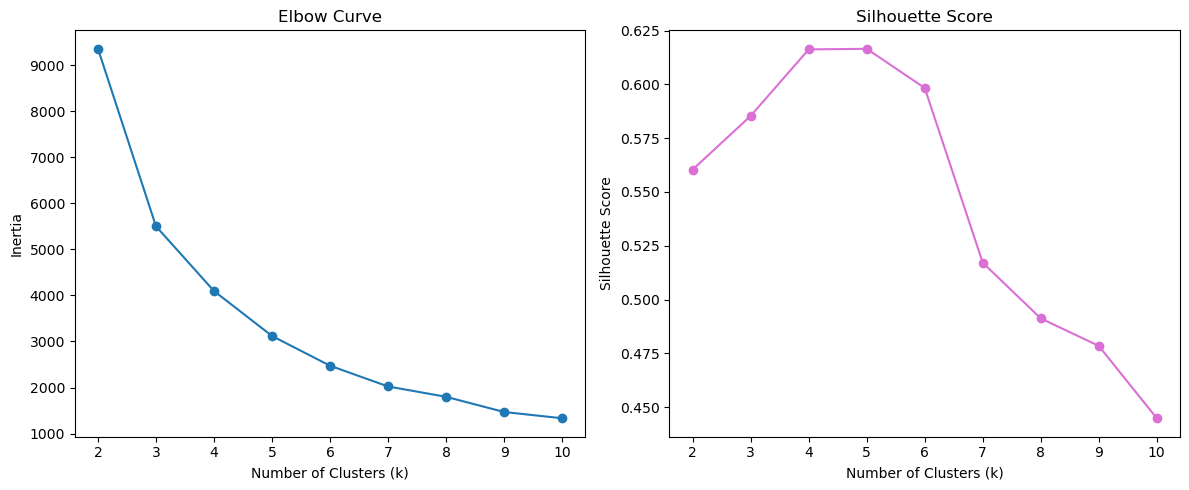

In [50]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, labels))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o', color='orchid')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## 7.CLUSTERING

### 7.1.APPLY K-MEANS ALGORITHM

In [51]:
# Final model
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Average RFM per cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

# Count of customers
cluster_profiles['NumCustomers'] = rfm['Cluster'].value_counts().sort_index()

print(cluster_profiles)



         Recency  Frequency  Monetary  NumCustomers
Cluster                                            
0           43.7        3.7    1353.6          3054
1          248.1        1.6     478.8          1067
2            7.4       82.5  127188.0            13
3           15.5       22.3   12690.5           204


### LABEL SEGMENTS

In [52]:
cluster_labels = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


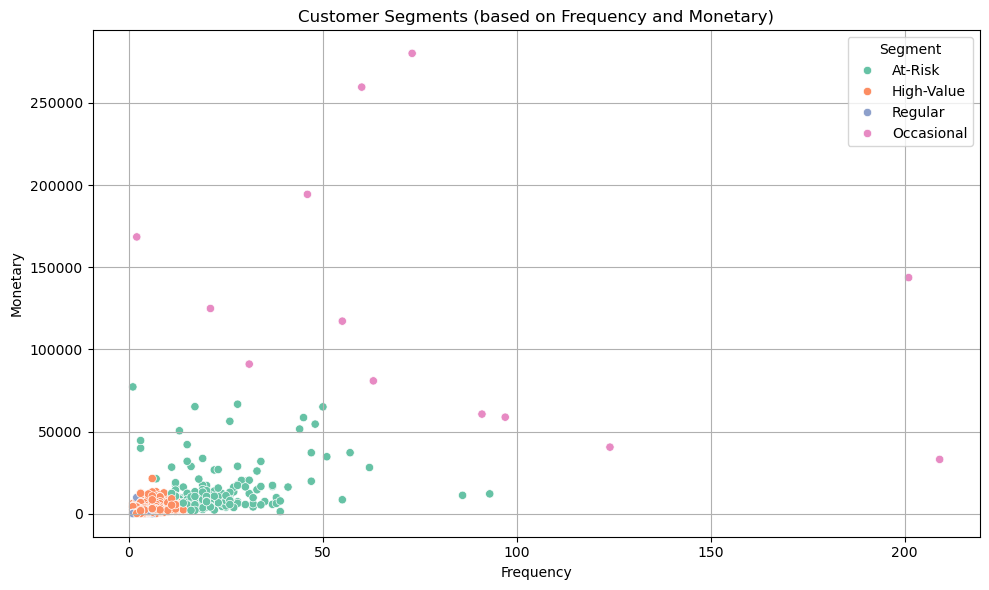

In [53]:
# 2D Scatter Plot: Frequency vs Monetary
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2')
plt.title("Customer Segments (based on Frequency and Monetary)")
plt.grid(True)
plt.tight_layout()
plt.show()



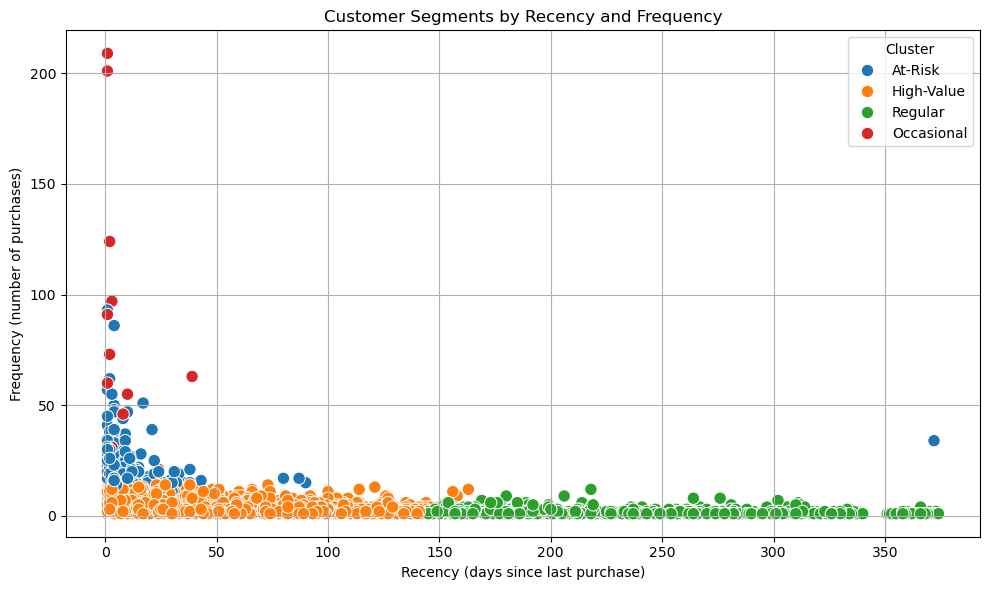

In [54]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='tab10', s=80)
plt.title('Customer Segments by Recency and Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


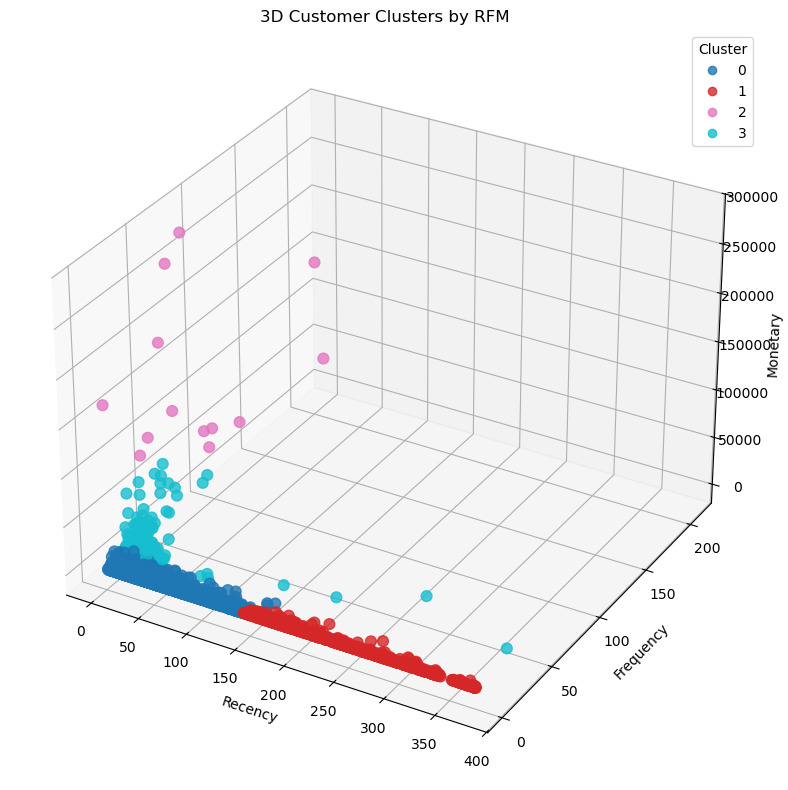

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='tab10',
    s=60,
    alpha=0.8
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Clusters by RFM')

plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()


## 8.PRODUCT RECOMMENDATION SYSTEM

### 8.1.CREATING PIVOT TABLE FOR CUSTOMERS VS PRODUCTS

In [56]:
item_matrix = df.pivot_table(index='CustomerID',
                              columns='StockCode',
                              values='Quantity',
                              aggfunc='sum').fillna(0)

### 8.2.COMPUTING PRODUCT COSINE SIMILARITY

In [57]:
# Transpose so products are rows
product_similarity = cosine_similarity(item_matrix.T)

# Convert to DataFrame with StockCodes as index/columns
product_similarity_df = pd.DataFrame(product_similarity,
                              index=item_matrix.columns,
                              columns=item_matrix.columns)

In [58]:
# Create StockCode → Product Description lookup
product_names = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

### RECOMMENDATION

In [61]:
def recommend_by_product_name(product_name, top_n=5):
    # 1. Search for the StockCode using partial name match
    def get_code_by_name(name):
        for code, desc in product_names.items():
            if name.lower() in desc.lower():
                return code
        return None

    # 2. Recommend based on similar products
    def recommend_products(stock_code, top_n):
        if stock_code not in product_similarity_df:
            return [f"StockCode {stock_code} not found in similarity matrix."]
        
        sim_scores = product_similarity_df[stock_code].sort_values(ascending=False).drop(stock_code)
        top_similar = sim_scores.head(top_n).index
        return [f"{code} - {product_names.get(code, 'Unknown Product')}" for code in top_similar]

    # 3. Main logic: get StockCode, recommend
    code = get_code_by_name(product_name)
    if code:
        print(f"Recommendations for: {product_names[code]} ({code})")
        return recommend_products(code, top_n)
    else:
        return [f"Product name '{product_name}' not found."]

In [62]:
recommendations = recommend_by_product_name("RED HANGING HEART T-LIGHT HOLDER")
for rec in recommendations:
    print(rec)

Recommendations for: RED HANGING HEART T-LIGHT HOLDER (21733)
22117 - METAL SIGN HER DINNER IS SERVED 
22479 - DAISY GARDEN MARKER
21897 - POTTING SHED CANDLE CITRONELLA
21898 - POTTING SHED ROSE CANDLE
82551 - LAUNDRY 15C METAL SIGN


In [63]:
import joblib

# Save similarity matrix and product name dictionary
joblib.dump(product_similarity_df, "product_similarity.pkl")
joblib.dump(product_names, "product_names.pkl")
print("Recommendation model saved.")

Recommendation model saved.


In [64]:
# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")
print("Saved: scaler.pkl & kmeans_model.pkl")

Saved: scaler.pkl & kmeans_model.pkl
